# Jakiel David
# Task 3 
# 2/25/23

## Case Study: Classification with k- Nearest Neighbors and the Digits Dataset , Part 1

15.2.2 Loading the Dataset

In [75]:
from sklearn.datasets import load_digits

digits = load_digits()

Displaying the Description

In [76]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Checking the Sample and Target Sizes

In [77]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [78]:
digits.data.shape

(1797, 64)

A Sanple Digit Image

In [79]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

15.2.3 Visualization the Data

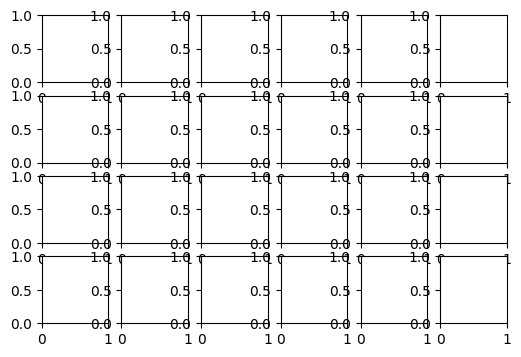

In [80]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

Displaying Each Image and Removing the Axes Labels

In [81]:
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

15.2.4 Splitting the Data for Training and Testing

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

Training and Testing Set Sizes

In [84]:
X_train.shape

(1347, 64)

In [85]:
X_test.shape

(450, 64)

15.2.5 Creating the Model

In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

15.2.6 Training the Model

In [87]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(n_neighbors=3)

15.2.7 Predicting Digit Classes

In [88]:
predicted = knn.predict(X=X_test)

expected = y_test

In [89]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [90]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [91]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(5, 3), (8, 9), (1, 4), (4, 9), (7, 3), (3, 8), (3, 8), (1, 8)]

##   15.3 Case Study: Classification with k- Nearest Neighbors and the Digits Dataset , Part 2

15.3.1 Metrics for Model Accuracy

In [92]:
print(f'{knn.score(X_test, y_test):.2%}') # Estimator method score

98.22%


In [93]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted) # cinfusion matrix

In [94]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  1,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]])

Classification Report

In [95]:
from sklearn.metrics import classification_report

names = [str(digit) for digit in digits.target_names]

print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      1.00      0.98        45
           2       1.00      1.00      1.00        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.98      1.00      0.99        45
           8       0.98      0.93      0.95        44
           9       1.00      0.95      0.98        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Visualizing Confusion Matrix

In [96]:
import pandas as pd

confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

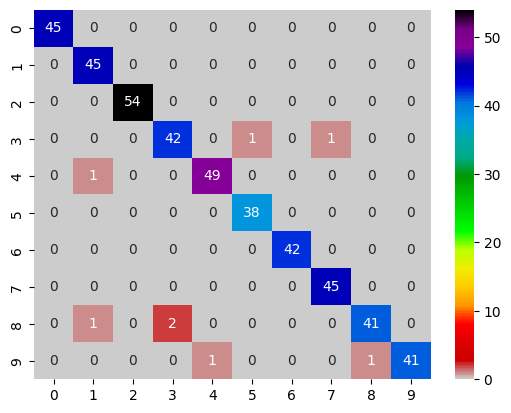

In [97]:
import seaborn as sns

axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

15.3.2 K Fold Cross- Validation


In [98]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

Using teh KFold Object with Fucntion cross_val_score

In [99]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

In [100]:
scores

array([0.97777778, 1.        , 0.98333333, 0.98333333, 0.99444444,
       0.98888889, 0.98333333, 0.98882682, 1.        , 0.98324022])

In [101]:
print(f'Medan accuracy: {scores.mean():.2%}')

Medan accuracy: 98.83%


In [102]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.72%


15.3.3 Running Multiple Models to Find the Best One

In [103]:
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

In [104]:
estimators = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

In [105]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
        X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.83%; standard deviation=0.72%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


15.3.4 Hyperparameter Tuning

In [106]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
        X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.39%; standard deviation=0.80%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.55%; standard deviation=1.06%
k=19; mean accuracy=97.66%; standard deviation=0.96%


## 15.4 Case Study: Time Series and Sim[le Linear Regression

Loading Average High Tempuratures into a DF

In [107]:
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly ']

nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


Splitting the Data for Training and Testing

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

X_train.shape

(93, 1)

In [109]:
X_test.shape

(31, 1)

Training the Model

In [110]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [111]:
linear_regression.coef_

array([0.01939167])

In [112]:
linear_regression.intercept_

-0.30779820252656265

Testing the Model


In [113]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


Predicting Future Temps and Estimating Past Temps

In [114]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2019)

array([38.84399018])

In [115]:
predict(1890)

array([36.34246432])

Visualizing teh Dataset with Regression Line

(10.0, 70.0)

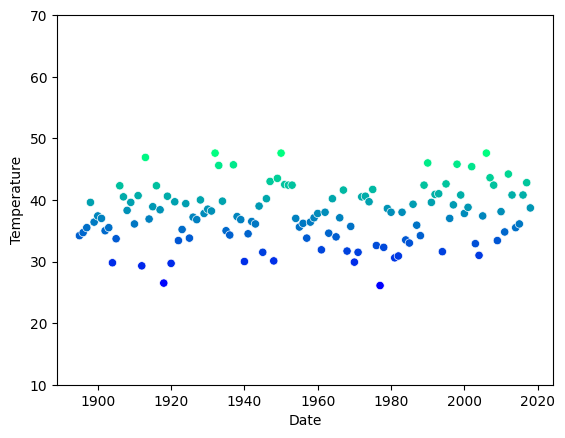

In [116]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)


In [117]:
import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)

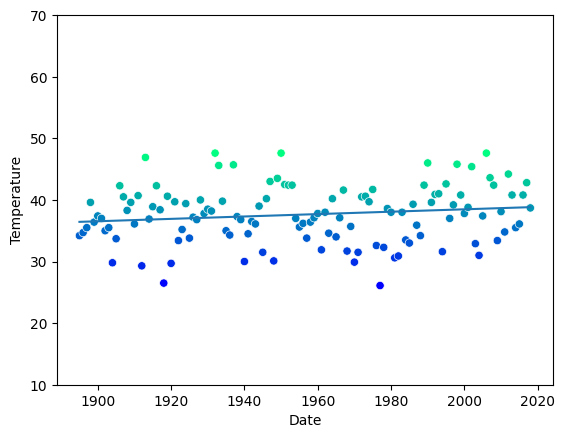

In [118]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
line = plt.plot(x,y)